# Mastercamp Data Science Project

## Préparation des données

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
df = pd.read_csv('assets/valeursfoncieres-2022.txt', sep='|', low_memory=True, dtype=str)

On regarde la data pour la première fois

In [3]:
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,1,2,Appartement,NaN,24,1,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,1,2,Appartement,NaN,140,3,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510


On vérifie sa forme et le nom de toutes ses colonnes

In [4]:
print('Shape: ', df.shape)
print('Columns: ', df.columns)

Shape:  (3803885, 43)
Columns:  Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')


On voit très vite que la target variable est "valeur fonciere"

On détermine les colonnes avec seulement des valeurs nulles et on les supprime

In [5]:
to_drop = df.columns[df.isnull().all()]
print('Columns with only NaN: ', to_drop)

Columns with only NaN:  Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'Identifiant local'],
      dtype='object')


In [6]:
df.drop(to_drop, axis=1, inplace=True)
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,000001,03/01/2022,Vente,"55000,00",13,NaN,RUE,2280,DE LA LIBERTE,1000,...,NaN,NaN,1,2,Appartement,24,1,NaN,NaN,NaN
1,000001,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480,...,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,84
2,000001,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480,...,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,88
3,000001,03/01/2022,Vente,"143000,00",98,NaN,RTE,0055,DE LA DOMBES,1480,...,NaN,NaN,1,2,Appartement,140,3,NaN,NaN,NaN
4,000001,04/01/2022,Vente,"300,00",NaN,NaN,NaN,B031,AUX PIERRES,1480,...,NaN,NaN,0,NaN,NaN,NaN,NaN,T,NaN,510


In [7]:
print('Le nombre de ligne possédant au moins une valeur NaN: ', df.isnull().any(axis=1).sum())

Le nombre de ligne possédant au moins une valeur NaN:  3803885


Toutes les lignes ont au moins une valeur nulle. Il va falloir faire un choix dans les colonnes à garder

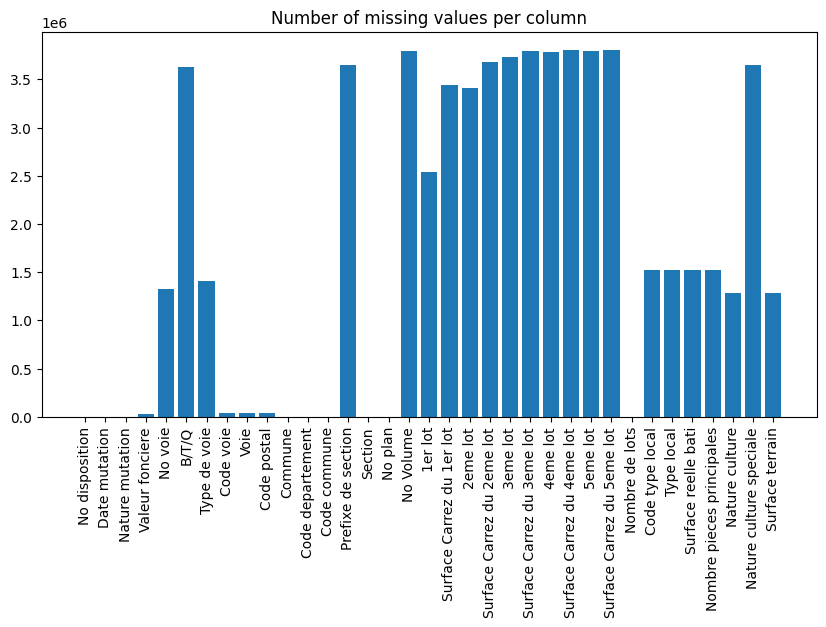

In [8]:
plt.figure(figsize=(10, 5))
plt.bar(df.isnull().sum().index, df.isnull().sum().values)
plt.xticks(rotation=90)
plt.title('Number of missing values per column')
plt.show()

On aperçoie énormément de colonnes possédant beaucoup de valeurs nulles. Malheureusement, la valeur foncière dépend grandement de la surface Carrez (surface habitable selon la loi Carrez) ce qui risque de poser problème au vu du graphique.

In [9]:
print('Le nombre de ligne possédant au moins une valeur de surface Carrez: ', df[['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].notnull().any(axis=1).sum())

Le nombre de ligne possédant au moins une valeur de surface Carrez:  499290


Ce nombre suffit à faire un dataset pertinent s'il n'est pas biaisé

En ce fiant à la documentation du dataset et au graphique, les colonnes "No voie", "B/T/Q" "Prefixe de section", "No Volume" possède beaucoup de valeurs nulles et peu de manières de les remplacer. On ferait mieux de s'en débarasser. De plus, on supprime les données ne possédant **AUCUNE** surface Carrez

In [10]:
df.drop(['No voie', 'B/T/Q', 'Prefixe de section', 'No Volume', 'Code type local'], axis=1, inplace=True)

df.dropna(subset=['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot'], how='all', inplace=True)

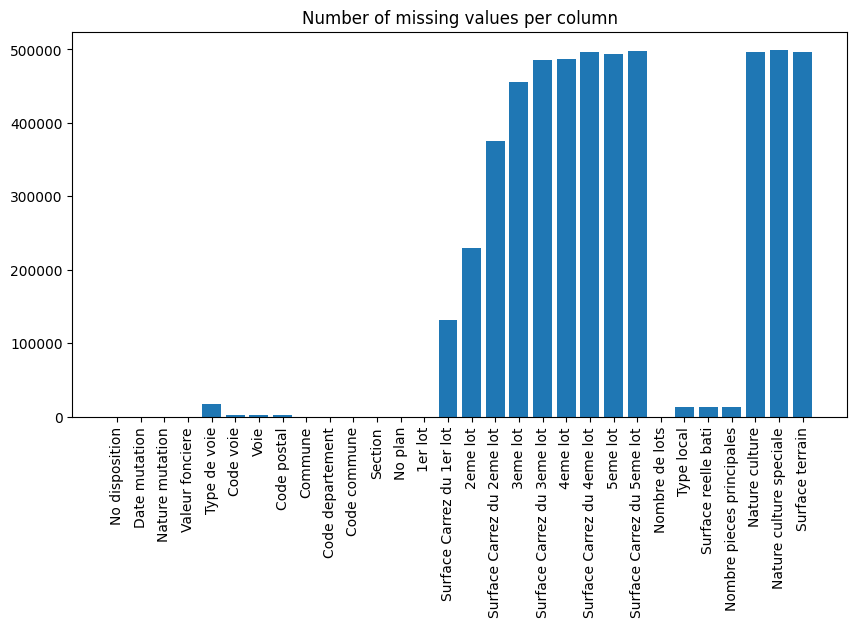

In [11]:
plt.figure(figsize=(10, 5))
plt.bar(df.isnull().sum().index, df.isnull().sum().values)
plt.xticks(rotation=90)
plt.title('Number of missing values per column')
plt.show()

Nous n'avons pas besoin d'informations sur les terrains puisqu'elles sont toutes pratiquement nulles (le type de surface et la surface elle-même). Nous pouvons aussi faire disparaitre Code voie car nous avons la voie. De même pour commune car nous avons le code commune. On enlève ensuite les informations qui se ressemble (ex: référence cadastre de la parcelle, nous avons déjà le département ainsi que la commune)

In [12]:
df.drop(['1er lot', '2eme lot', '3eme lot', '4eme lot', '5eme lot', 'Nature culture', 'Nature culture speciale', 'Surface terrain', 'Commune', 'Code voie', 'Section', 'No plan', 'No disposition'], axis=1, inplace=True)

On change le type de nos données et on s'occupe de la fin du nettoyage

In [13]:
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',', '.').astype(float)

In [14]:
df['Surface Carrez du 1er lot'] = df['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float).fillna(0)
df['Surface Carrez du 2eme lot'] = df['Surface Carrez du 2eme lot'].str.replace(',', '.').astype(float).fillna(0)
df['Surface Carrez du 3eme lot'] = df['Surface Carrez du 3eme lot'].str.replace(',', '.').astype(float).fillna(0)
df['Surface Carrez du 4eme lot'] = df['Surface Carrez du 4eme lot'].str.replace(',', '.').astype(float).fillna(0)
df['Surface Carrez du 5eme lot'] = df['Surface Carrez du 5eme lot'].str.replace(',', '.').astype(float).fillna(0)

In [15]:
df['Nombre de lots'] = df['Nombre de lots'].astype(int).fillna(0)
df['Nombre pieces principales'] = df['Nombre pieces principales'].astype(float).fillna(0)
df['Surface reelle bati'] = df['Surface reelle bati'].astype(float).fillna(0)

In [16]:
df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y')

On labelise les colonnes qui sont des catégories

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
df['Type de voie'] = le.fit_transform(df['Type de voie'])
df['Voie'] = le.fit_transform(df['Voie'])
df['Code postal'] = le.fit_transform(df['Code postal'])
df['Code commune'] = le.fit_transform(df['Code commune'])

On nettoie une dernière fois avant l'analyse, il ne reste que très peu de NaN, on peut se permettre de les enlever comme cela

In [19]:
df.dropna(inplace=True)

On créée une colonne Surface Carrez totale

In [20]:
df['Surface Carrez totale'] = df['Surface Carrez du 1er lot'] + df['Surface Carrez du 2eme lot'] + df['Surface Carrez du 3eme lot'] + df['Surface Carrez du 4eme lot'] + df['Surface Carrez du 5eme lot']

## Analyses & graphiques

In [21]:
df['Date mutation'] = df['Date mutation'].dt.to_period('M')

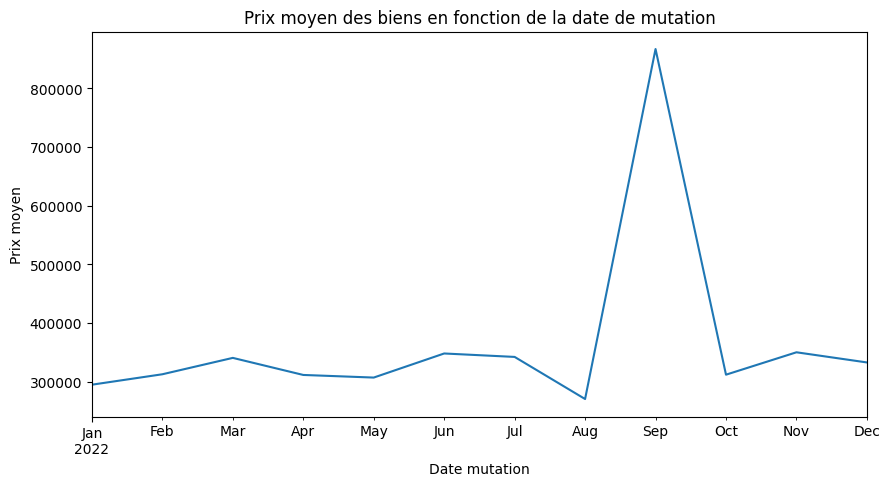

In [22]:
df.groupby('Date mutation')['Valeur fonciere'].mean().plot(figsize=(10, 5))
plt.title('Prix moyen des biens en fonction de la date de mutation')
plt.xlabel('Date mutation')
plt.ylabel('Prix moyen')
plt.show()

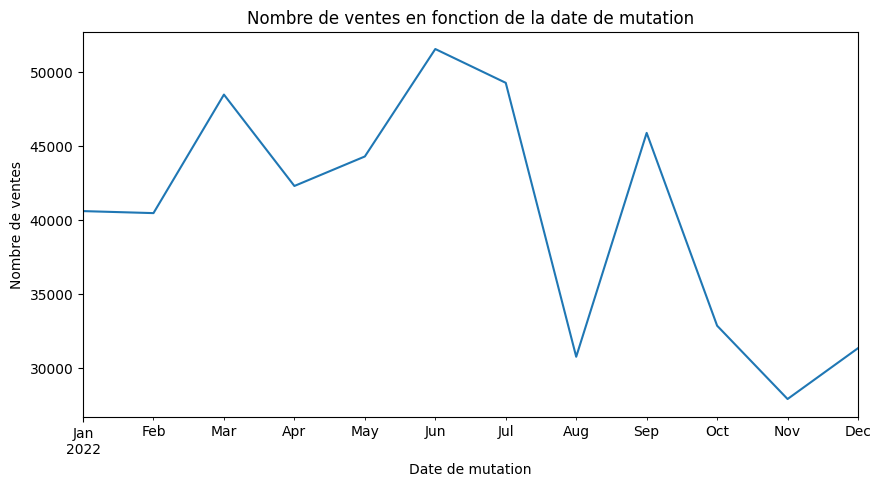

In [23]:
df.groupby('Date mutation')['Valeur fonciere'].count().plot(figsize=(10, 5))
plt.title('Nombre de ventes en fonction de la date de mutation')
plt.xlabel('Date de mutation')
plt.ylabel('Nombre de ventes')
plt.show()

On remarque que les mois font varier le prix de vente, cela a donc un impact sur la prédiction

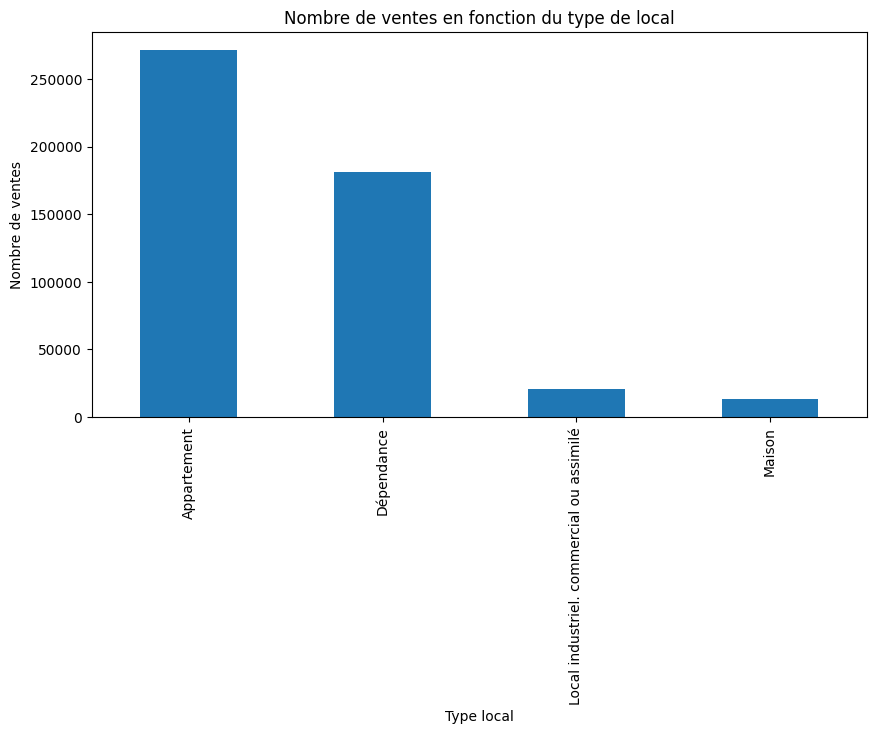

In [24]:
df.groupby('Type local')['Valeur fonciere'].count().plot(kind='bar', figsize=(10, 5))
plt.title('Nombre de ventes en fonction du type de local')
plt.xlabel('Type local')
plt.ylabel('Nombre de ventes')
plt.show()

df['Type local'] = le.fit_transform(df['Type local'])

Nous n'avons pas un nombre égal de vente par type de local, cela pourra peut-être biaiser le résultat

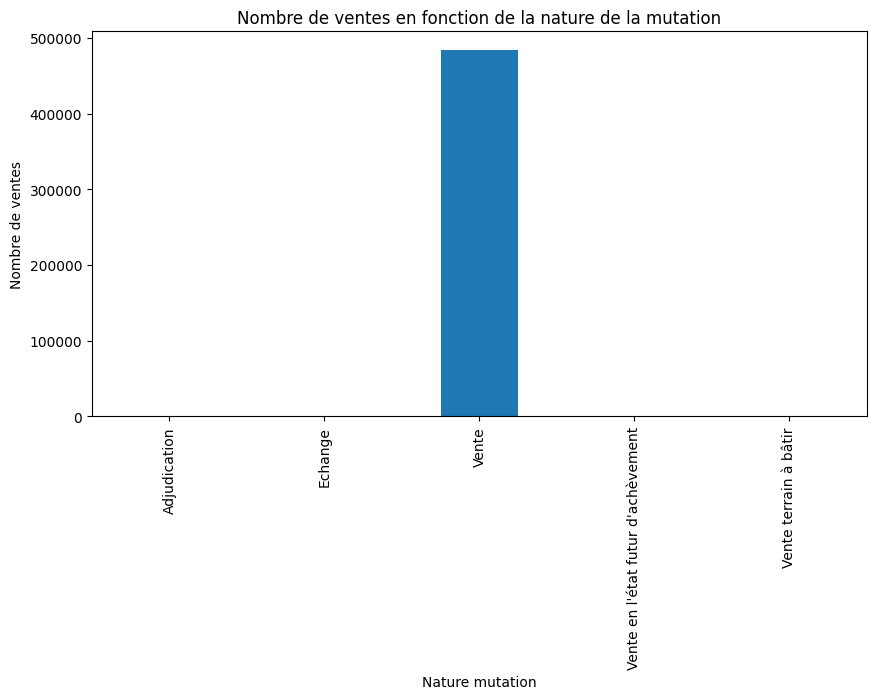

In [25]:
df.groupby('Nature mutation')['Valeur fonciere'].count().plot(kind='bar', figsize=(10, 5))
plt.title('Nombre de ventes en fonction de la nature de la mutation')
plt.xlabel('Nature mutation')
plt.ylabel('Nombre de ventes')
plt.show()

df['Nature mutation'] = le.fit_transform(df['Nature mutation'])

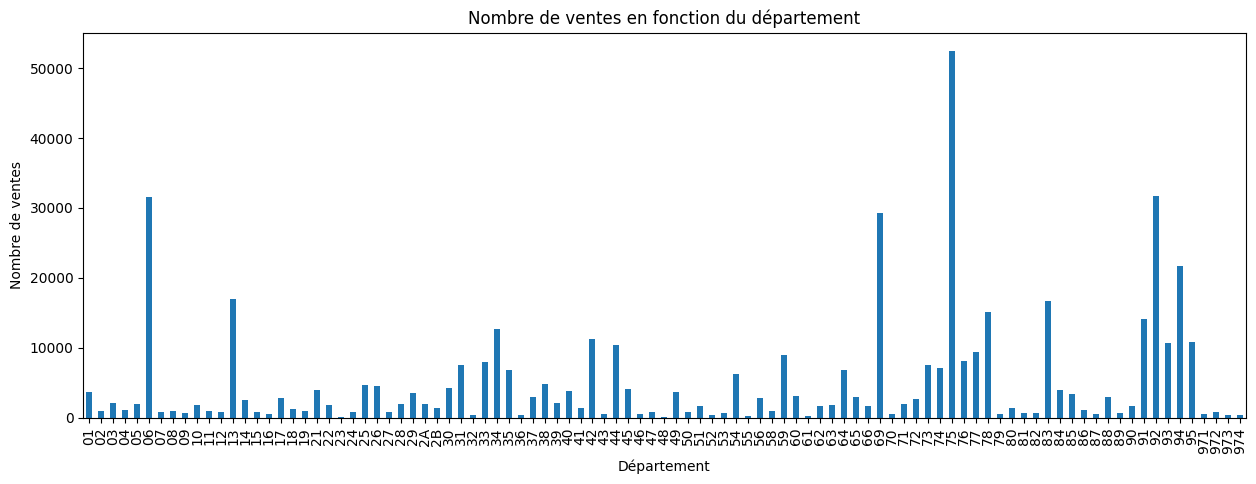

In [26]:
df.groupby('Code departement')['Valeur fonciere'].count().plot(kind='bar', figsize=(15, 5))
plt.title('Nombre de ventes en fonction du département')
plt.xlabel('Département')
plt.ylabel('Nombre de ventes')
plt.show()

df['Code departement'] = le.fit_transform(df['Code departement'])

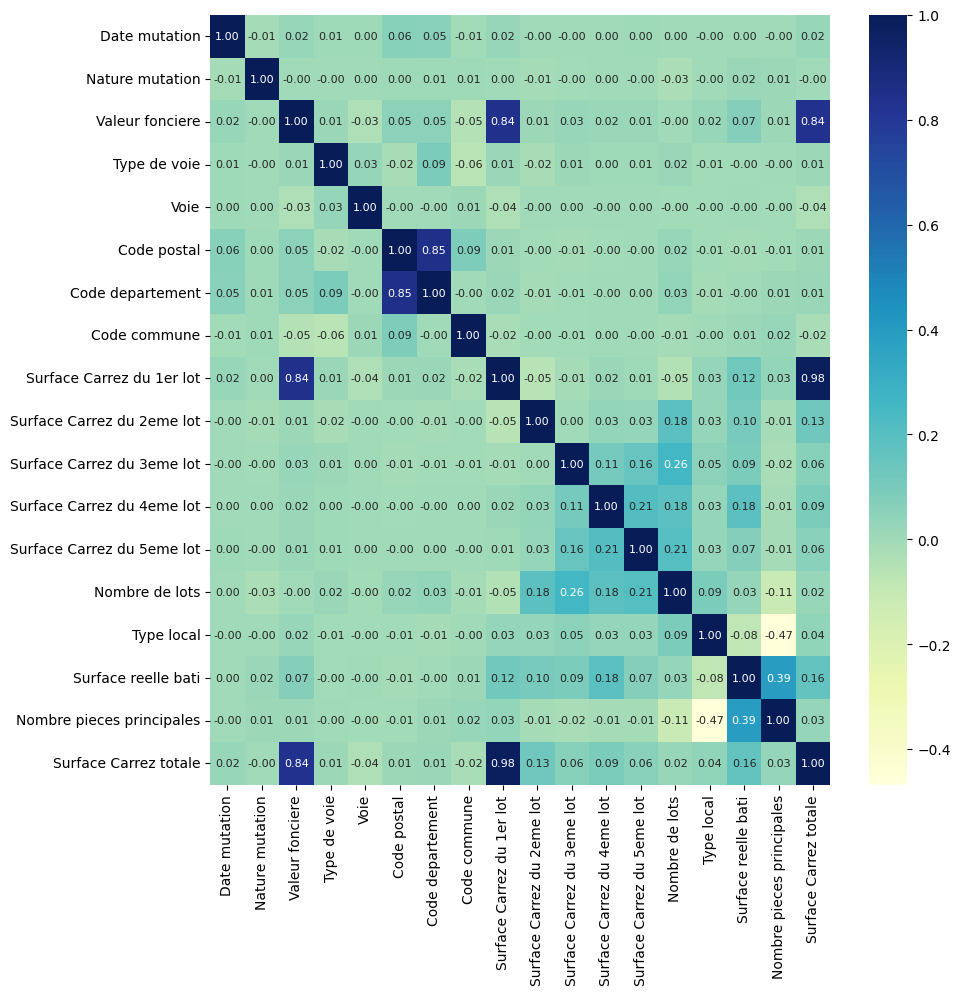

In [27]:
df['Date mutation'] = le.fit_transform(df['Date mutation'])
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt='.2f', annot_kws={"size": 8})
plt.yticks(rotation=0, fontsize=10)
plt.show()

On se rend alors compte que la valeur foncière dépend évidemment de la surface Carrez

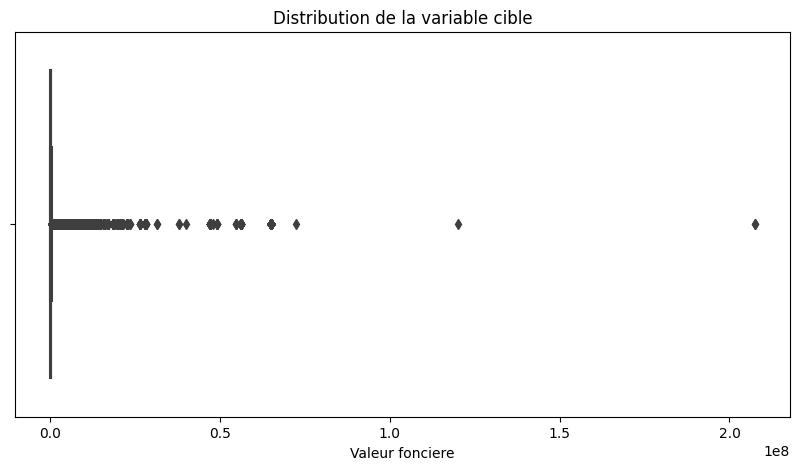

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Valeur fonciere'])
plt.title('Distribution de la variable cible')
plt.show()

On va utiliser le z-score pour enlever les outliers

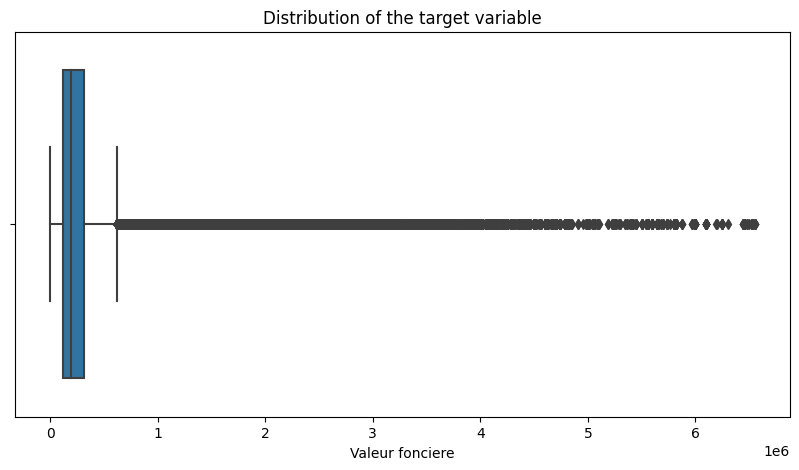

In [29]:
from scipy import stats

z = np.abs(stats.zscore(df['Valeur fonciere']))
threshold = 3

df = df[(z < 3)]

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Valeur fonciere'])
plt.title('Distribution of the target variable')
plt.show()

## Modélisation

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr

On sépare en training et testing

In [31]:
X = df.drop(['Valeur fonciere'], axis=1)
y = df['Valeur fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((387512, 17), (96878, 17), (387512,), (96878,))

On créée une fonction pour vérifier la performance des modèles

In [32]:
def spearman_corr(estimator, X, y):
    y_pred = estimator.predict(X)
    return spearmanr(y, y_pred)[0]

In [33]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('[Training] R2 Score: ', lr_model.score(X_train, y_train))
print('[Training] Spearman correlation: ', spearman_corr(lr_model, X_train, y_train))

print('[Testing] R2 Score: ', lr_model.score(X_test, y_test))
print('[Testing] Spearman correlation: ', spearman_corr(lr_model, X_test, y_test))

[Training] R2 Score:  0.13757445607071306
[Training] Spearman correlation:  0.4623793482766217
[Testing] R2 Score:  0.1363276613491896
[Testing] Spearman correlation:  0.4654841369067972


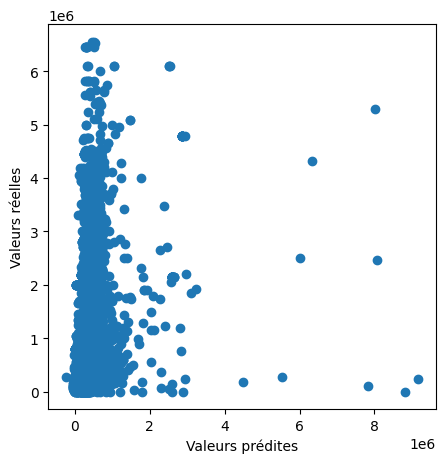

In [34]:
plt.figure(figsize=(5, 5))
plt.scatter(lr_model.predict(X_test), y_test)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.show()

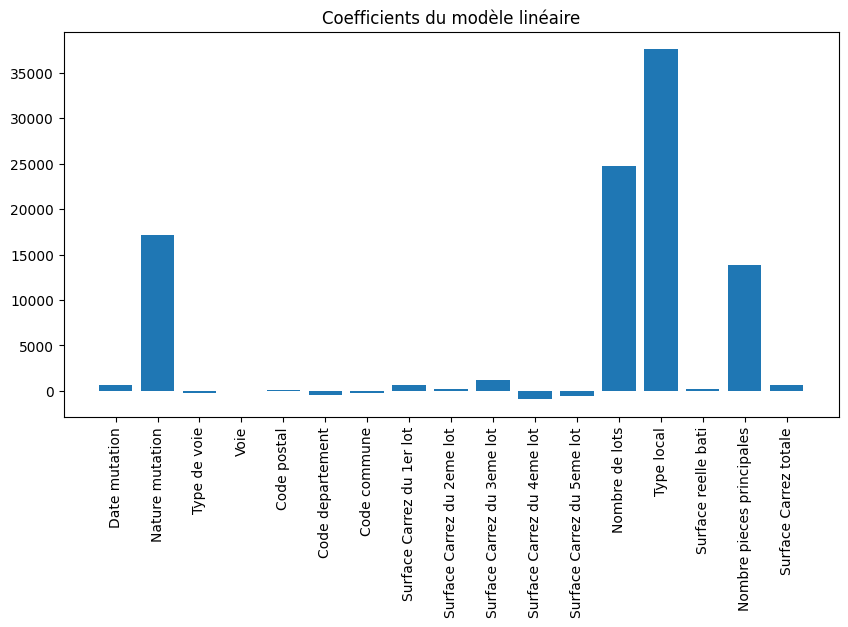

In [35]:
plt.figure(figsize=(10, 5))
plt.bar(X.columns, lr_model.coef_) 
plt.xticks(rotation=90)
plt.title('Coefficients du modèle linéaire')
plt.show()

In [36]:
knn_model = KNeighborsRegressor()
params = {'n_neighbors': [1, 3, 5]}
knn_grid = GridSearchCV(knn_model, params, cv=5, scoring=spearman_corr)
knn_grid.fit(X_train, y_train)

print('Best parameters: ', knn_grid.best_params_)
print('[Training] Best Spearman correlation: ', knn_grid.best_score_)
print('[Testing] Spearman: ', knn_grid.score(X_test, y_test))

Best parameters:  {'n_neighbors': 1}
[Training] Best Spearman correlation:  0.8173601845080334
[Testing] Spearman:  0.8390032511744699


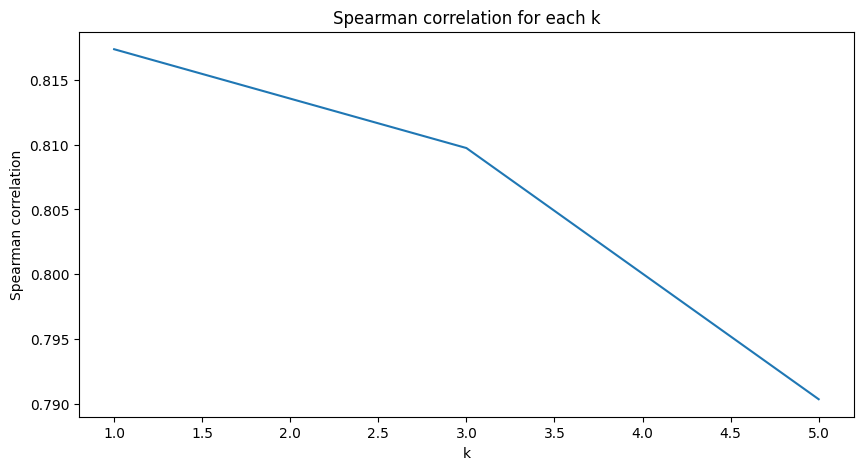

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(knn_grid.cv_results_['param_n_neighbors'].data, knn_grid.cv_results_['mean_test_score'])
plt.xlabel('k')
plt.ylabel('Spearman correlation')
plt.title('Spearman correlation for each k')
plt.show()

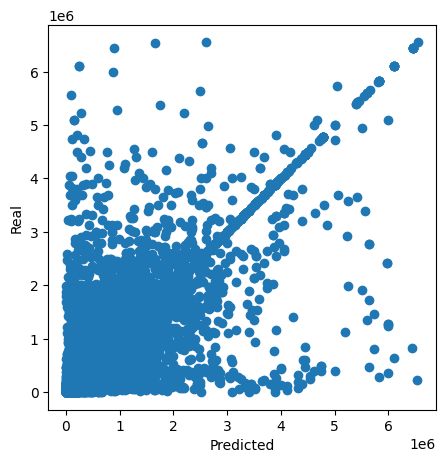

In [38]:
plt.figure(figsize=(5, 5))
plt.scatter(knn_grid.predict(X_test), y_test)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [39]:
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train, y_train)

print('[Training] R2 Score: ', forest_model.score(X_train, y_train))
print('[Training] Spearman correlation: ', spearman_corr(forest_model, X_train, y_train))
print('[Testing] R2 Score: ', forest_model.score(X_test, y_test))
print('[Testing] Spearman correlation: ', spearman_corr(forest_model, X_test, y_test))

[Training] R2 Score:  0.9764777425855459
[Training] Spearman correlation:  0.9806357896621357
[Testing] R2 Score:  0.829795153517709
[Testing] Spearman correlation:  0.903587290351537


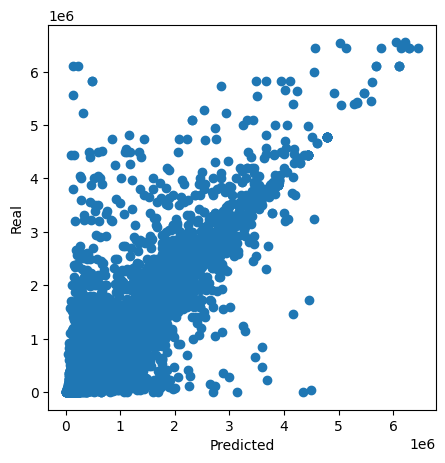

In [40]:
plt.figure(figsize=(5, 5))
plt.scatter(forest_model.predict(X_test), y_test)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

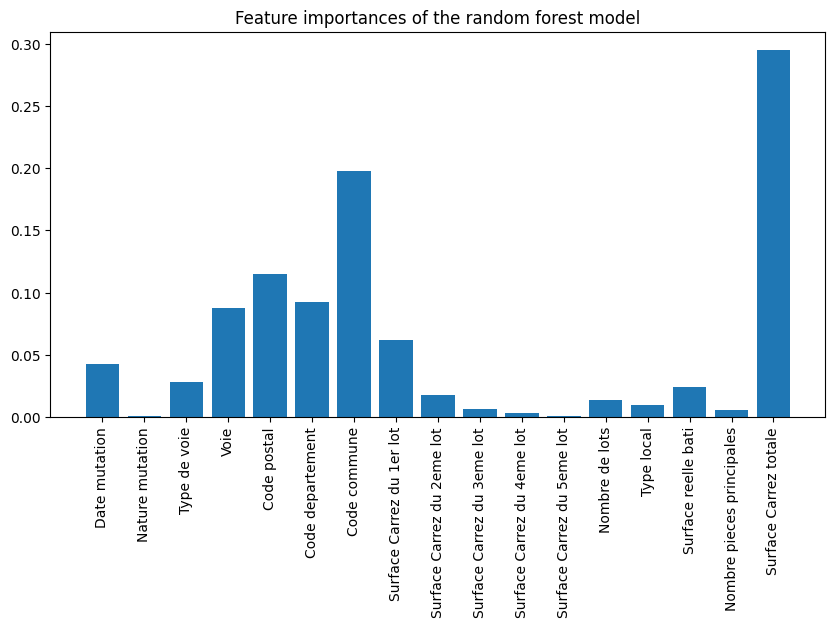

In [41]:
plt.figure(figsize=(10, 5))
plt.bar(X.columns, forest_model.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature importances of the random forest model')
plt.show()

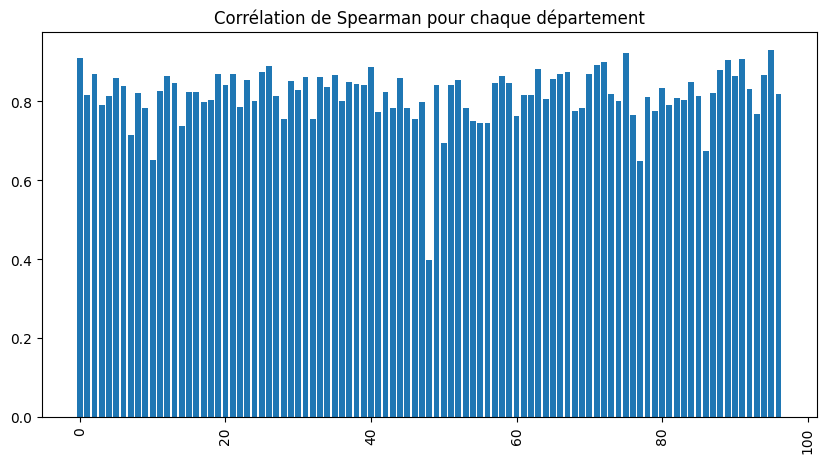

In [42]:
dict_dep = {}
model_dep = RandomForestRegressor(n_estimators=100)
for dep in df['Code departement'].unique():
    df_dep = df[df['Code departement'] == dep]
    X_dep = df_dep.drop(['Valeur fonciere'], axis=1)
    y_dep = df_dep['Valeur fonciere']

    X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X_dep, y_dep, test_size=0.2)

    model_dep.fit(X_train_dep, y_train_dep)
    dict_dep[dep] = spearman_corr(model_dep, X_test_dep, y_test_dep)

plt.figure(figsize=(10, 5))
plt.bar(dict_dep.keys(), dict_dep.values())
plt.xticks(rotation=90)
plt.title('Corrélation de Spearman pour chaque département')
plt.show()


In [43]:
dict_dep = {k: v for k, v in sorted(dict_dep.items(), key=lambda item: item[1], reverse=True)}
dict_dep

{95: 0.929260738621757,
 75: 0.9227900739209967,
 0: 0.909164466217091,
 91: 0.9069630104522262,
 89: 0.9050813547047134,
 72: 0.9005529070254356,
 71: 0.892195922319187,
 26: 0.8896883990106376,
 40: 0.8875721424313995,
 63: 0.8822875545956278,
 88: 0.8800750769508785,
 25: 0.8748006533022139,
 67: 0.8735474368057822,
 19: 0.869450905322294,
 70: 0.8692944422005456,
 21: 0.8692091689669439,
 66: 0.8689324109506391,
 2: 0.8683091744223713,
 35: 0.8668072750135944,
 94: 0.865927062683274,
 90: 0.8651046953279329,
 12: 0.8641627809439559,
 58: 0.8629988365587172,
 33: 0.8623953368626085,
 31: 0.860900438353694,
 44: 0.859580860429176,
 5: 0.8585985418322832,
 65: 0.8555707460375932,
 23: 0.8538529522602005,
 52: 0.8525693068119455,
 29: 0.8516021089289878,
 37: 0.8492696579425671,
 84: 0.8481225879189911,
 57: 0.847278900471633,
 59: 0.845408097695334,
 13: 0.8451753444450556,
 38: 0.8446922272751091,
 49: 0.8422972732489639,
 51: 0.8413257941027715,
 39: 0.8411889123454821,
 20: 0.84034